In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [21]:

class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=10000):
        # init parameters
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _init_params(self):
        self.weights = np.zeros(self.n_features)
        self.bias = 0

    def _update_params(self, dw, db):
        self.weights -= self.lr * dw
        self.bias -= self.lr * db

    def _get_prediction(self, X):
        return np.dot(X, self.weights) + self.bias


    def _get_gradients(self, X, y, y_pred):
        # get distance between y_pred and y_true
        error = y_pred - y
        # compute the gradients of weight & bias
        dw = (1 / self.n_samples) * np.dot(X.T, error)
        db = (1 / self.n_samples) * np.sum(error)
        return dw, db

    def fit(self, X, y):
        # get number of samples & features
        self.n_samples, self.n_features = X.shape
        # init weights & bias
        self._init_params()

        # perform gradient descent for n iterations
        for _ in range(self.n_iters):
            # get y_prediction
            y_pred = self._get_prediction(X)
            # compute gradients
            dw, db = self._get_gradients(X, y, y_pred)
            # update weights & bias with gradients
            self._update_params(dw, db)

    def predict(self, X):
        y_pred = self._get_prediction(X)
        return y_pred

def mse(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)
train_dataset = genfromtxt('lab_1_train.csv', delimiter=',')
X_train = train_dataset[:, [1]]
Y_train = train_dataset[:, 2]

test_dataset = genfromtxt('lab_1_test.csv', delimiter=',')
X_test = test_dataset[:, [1]]
Y_test = test_dataset[:, 2]


linreg = LinearRegression(learning_rate=0.1, n_iters=10000)
linreg.fit(X_train, Y_train)
predictions = linreg.predict(X_test)
print(f"MSE: {mse(Y_test, predictions)}")

MSE: 0.07731374837026367


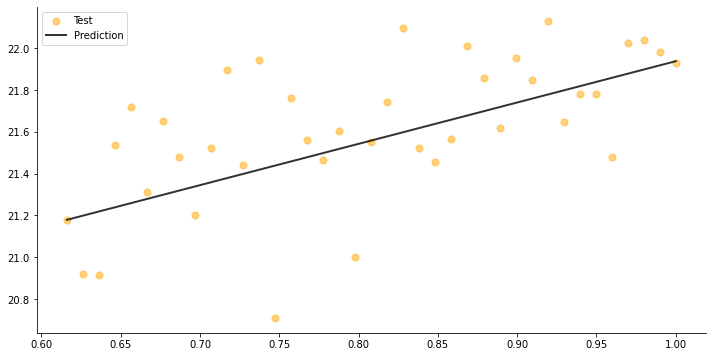

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))


ax.scatter(
    X_test,
    Y_test,
    c='orange',
    s=50,
    alpha=0.5,
    label='Test'
)

ax.plot(
    X_test, linreg.predict(X_test),
    c='black', lw=2, alpha=0.8, label='Prediction'
)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.legend()
plt.show()